In [1]:
# weight of a popcorn box
import numpy as np
import pandas as pd

In [2]:
# data randomly generated
pop = pd.DataFrame({'weight':np.random.randint(110,130,50)})
pop.head()

,weight
0,121
1,126
2,126
3,123
4,120


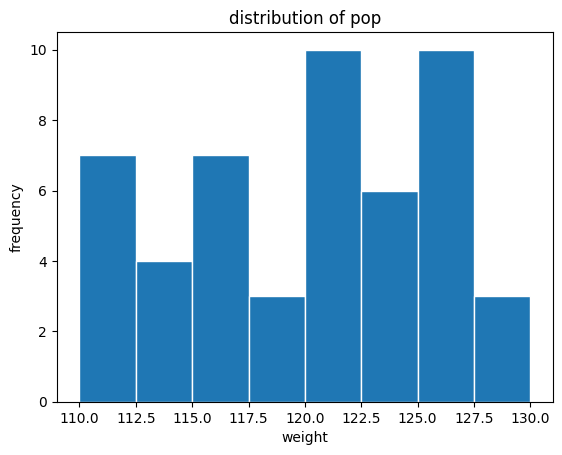

In [9]:
import matplotlib.pyplot as plt
plt.hist(pop['weight'], edgecolor='w', bins=np.arange(110,131,2.5))
plt.xlabel('weight')
plt.ylabel('frequency')
plt.title('distribution of pop')
plt.show()

In [4]:
# data following the normal distribution
pop_normal = pd.DataFrame({'weight':np.random.normal(120,15,50)}) #np.random.normal(mean,std,#_of_elements)
pop_normal.head()

,weight
0,115.747917
1,110.638213
2,144.339245
3,130.814095
4,127.767868


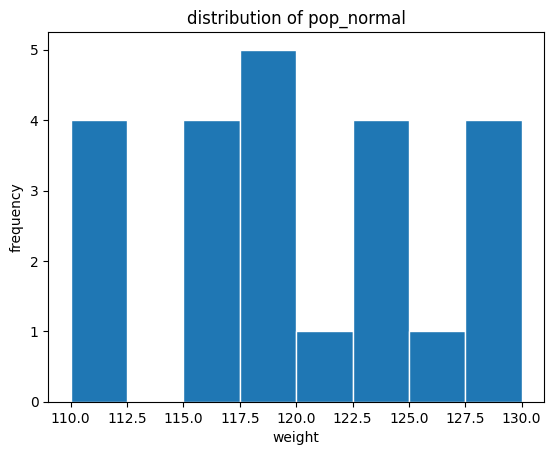

In [10]:
plt.hist(pop_normal['weight'], edgecolor='w', bins=np.arange(110,131,2.5))
plt.xlabel('weight')
plt.ylabel('frequency')
plt.title('distribution of pop_normal')
plt.show()

In [6]:
# data following the normal distribution
pop_normal2 = pd.DataFrame({'weight':np.random.normal(110,15,50)})
pop_normal2.head()

,weight
0,108.117066
1,109.697930
2,112.075734
3,119.654602
4,102.574641


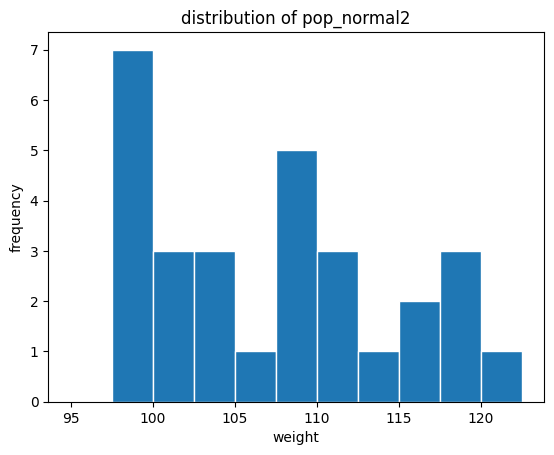

In [11]:
plt.hist(pop_normal2['weight'], edgecolor='w', bins=np.arange(95,125,2.5))
plt.xlabel('weight')
plt.ylabel('frequency')
plt.title('distribution of pop_normal2')
plt.show()

In [12]:
# test its normality first with Shapro-Wilk test
from scipy import stats
print('pop : ', stats.shapiro(pop['weight']))
print('pop_normal : ', stats.shapiro(pop_normal['weight']))
print('pop_normal2 : ', stats.shapiro(pop_normal2['weight']))

pop :  ShapiroResult(statistic=np.float64(0.9355546268806487), pvalue=np.float64(0.00902145419360508))
pop_normal :  ShapiroResult(statistic=np.float64(0.9848269378035199), pvalue=np.float64(0.7641389936223815))
pop_normal2 :  ShapiroResult(statistic=np.float64(0.9569322578908775), pvalue=np.float64(0.06613723809073573))


Whereas the pop does not follow the normal distribution, the others do. Use the <strong>Wilcoxon test</strong> for the non-normal distribution and <strong>t-test</strong> for the other.

T1. <strong>two-tailed test</strong>
<ul>
    <li>H0 : the average weight of popcorn boxes is 120</li>
    <li>H1 : the average weight of popcorn boxes is not 120</li>
</ul>

In [13]:
from scipy import stats
print('pop : ', stats.wilcoxon(pop['weight']-120)) # column - target_mean
print('pop_normal : ', stats.ttest_1samp(pop_normal['weight'], 120)) # column, mean

pop :  WilcoxonResult(statistic=np.float64(519.0), pvalue=np.float64(0.8139707200941186))
pop_normal :  TtestResult(statistic=np.float64(-0.34360022179162686), pvalue=np.float64(0.7326169754619095), df=np.int64(49))


In both cases, we <strong>accept the H0</strong> as their pvalues are higher than the significant level 0.05.

In [34]:
print('pop_normal : ', stats.ttest_1samp(pop_normal2['weight'], 120))

pop_normal :  TtestResult(statistic=-5.125080313329174, pvalue=5.030467050265728e-06, df=49)


In the third case, we reject H0 and thereby conclude that their mean is not 120.

T2. <strong>one-tailed test</strong>
<br>(1) Left test 
<ul>
    <li>H0 : m = 120</li>
    <li>H1 : m &lt; 120</li>
</ul>
(2) Right test
<ul>
    <li>H0 : m = 120</li>
    <li>H1 : 120 &lt; m</li>
</ul>
&#42;Note that the equal sign is not allowed for H1.

In [14]:
# Left test (alternative='less')
print('pop : ', stats.wilcoxon(pop['weight']-120, alternative='less'))
print('pop_normal : ', stats.ttest_1samp(pop_normal['weight'], 120, alternative='less'))
print('pop_normal2 : ', stats.ttest_1samp(pop_normal2['weight'], 120, alternative='less'))

pop :  WilcoxonResult(statistic=np.float64(519.0), pvalue=np.float64(0.4069853600470593))
pop_normal :  TtestResult(statistic=np.float64(-0.34360022179162686), pvalue=np.float64(0.36630848773095476), df=np.int64(49))
pop_normal2 :  TtestResult(statistic=np.float64(-3.7654453837083346), pvalue=np.float64(0.000222942709804421), df=np.int64(49))


Accept H0 only in the second case. The aplha error occurs in the first!

In [15]:
# Right test (alternative='less')
print('pop : ', stats.wilcoxon(pop['weight']-120, alternative='greater'))
print('pop_normal : ', stats.ttest_1samp(pop_normal['weight'], 120, alternative='greater'))
print('pop_normal2 : ', stats.ttest_1samp(pop_normal2['weight'], 120, alternative='greater'))

pop :  WilcoxonResult(statistic=np.float64(519.0), pvalue=np.float64(0.5930146399529407))
pop_normal :  TtestResult(statistic=np.float64(-0.34360022179162686), pvalue=np.float64(0.6336915122690452), df=np.int64(49))
pop_normal2 :  TtestResult(statistic=np.float64(-3.7654453837083346), pvalue=np.float64(0.9997770572901956), df=np.int64(49))


Accept H0 in all the cases; the beta error occurs in the last.